# Machine Learning with Tree Methods


For this project, I will be using public data that was available from LendingClub.com. 

This dataset covers the years 2007-2010, and I will be using this data to predict whether a borrower fully repaid their loan. 

#### Column descriptions: 

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Get Data

In [2]:
#read in data
df = pd.read_csv('loan_data.csv')

#see first 5 rows
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Info

Will use the describe() and info() methods to get a profile of the data.

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Exploratory Data Analysis 

Text(0.5, 0, 'FICO')

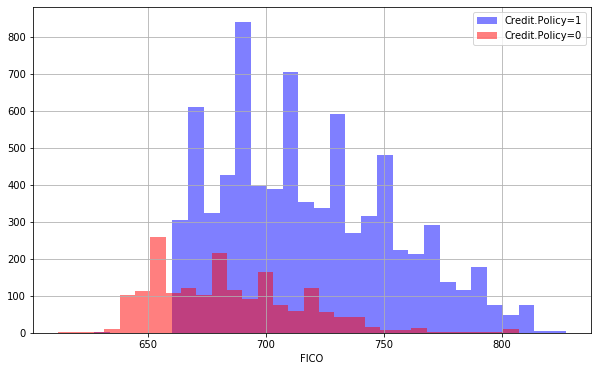

In [5]:
# Histogram of the FICO score for people with a credit policy of 1 and 0. The histograms will be overlaid.

plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

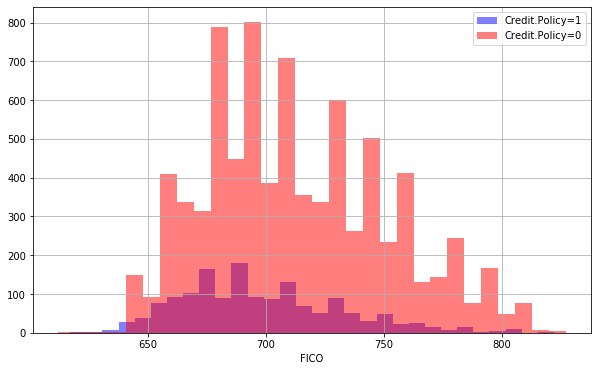

In [6]:
# Histogram of the FICO score for people who fully paid and didn't fully pay. The histograms will be overlaid.

plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='Credit.Policy=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

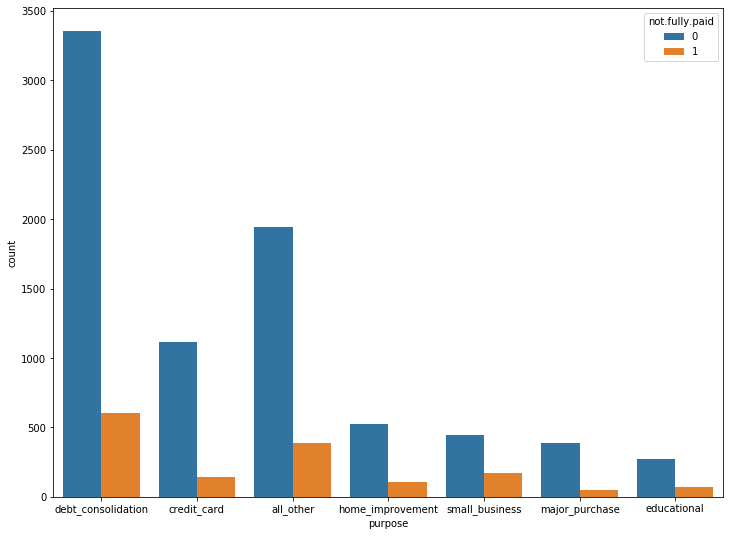

In [7]:
# countplot that shows the count of loans by purpose; segment the counts by whether the loans were fully paid or not.

plt.figure(figsize=(12,9))
sns.countplot(df['purpose'],  hue=df['not.fully.paid'])

<Figure size 1008x792 with 0 Axes>

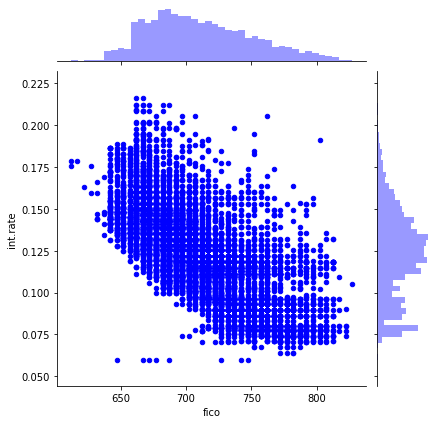

In [8]:
# trend between FICO score and interest rates; one would expect a downward trend on interest rate as FICO score increases.
plt.figure(figsize=(14,11))
sns.jointplot(df['fico'], df['int.rate'], color='blue', s=20)  #s argument is the mark size

<Figure size 1008x576 with 0 Axes>

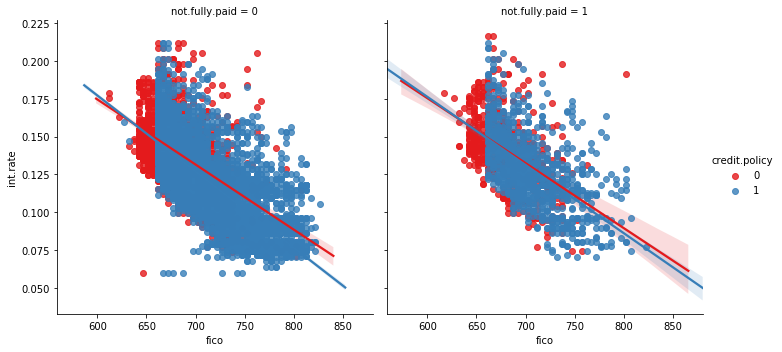

In [9]:
# lmplots to see if there is a differing trend between not.fully.paid and credit.policy
# note: use the col argument to split the chart into the two--fully paid and not fully paid
plt.figure(figsize=(14,8))
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy',
           fit_reg=True, col='not.fully.paid', palette='Set1') 

### Preparing the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


We know that **purpose** is a categorical feature. If we want to use it in our tree classifier, it has to be converted to dummy variables. This method is also known as **one-hot encoding**.

In [11]:
# create a list containing 1 element--the purpose feature
cat_features = ['purpose']

In [12]:
# use the get_dummies function to create dummy variables via one-hot encoding
#these new dummy variables are added to final_df
final_df = pd.get_dummies(df, columns=cat_features, drop_first=True)

#see first 5 rows
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Split Data

The data will now be split into a training and test set. 

In [13]:
from sklearn.model_selection import train_test_split

# this dataframe contains all the features, which is the original dataframe except not fully paid
X = final_df.drop(columns='not.fully.paid', axis=1)
# not fully paid is the target dataframe
y = final_df['not.fully.paid']

In [14]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Model

I will start by training a decision tree as a baseline.

In [15]:
from sklearn.tree import DecisionTreeClassifier

#instantiating a decision tree object
dt = DecisionTreeClassifier()

#training the model, aka fitting
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions and Evaluation of the Decision Tree

In [16]:
#predictions
predictions = dt.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

#confusion matrix
print(confusion_matrix(y_test, predictions))
print('\n')

[[1998  410]
 [ 368   98]]




In [18]:
#classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



### Predictions and Evaluation of the Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

#instantiate a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100)

#train model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
#predictions using Random Forest Classifier
rf_predictions = rf.predict(X_test)

In [30]:
#confusion matrix
print(confusion_matrix(y_test, rf_predictions))
print('\n')

[[2388   20]
 [ 456   10]]




In [31]:
#classification report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.33      0.02      0.04       466

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.76      0.83      0.77      2874



The Random Forest performed better than the Decision Tree in some areas, but not others. When choosing which model to go with, it depends on the class and area of performance in which you're looking for optimal performance.